# Multiple Linear Regression Code

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline


data = pd.read_csv('data_2d.csv', names = ['X1', 'X2', 'Y'])

In [6]:
# load the data
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

In [8]:
# let's plot the data to see what it looks like. This comes out in a 3-D plot that you can move around
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [10]:
# calculate the weights of our model

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X,w)

# Compute the R-Squared

In [13]:
d1 = Y-Yhat
d2 = Y - Y.mean()
r2 = 1-(d1.dot(d1))/d2.dot(d2)

print ('the r-squared is: ' +str(r2))

the r-squared is: 0.998004061248


# Polynomial Regression

In [14]:
# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)


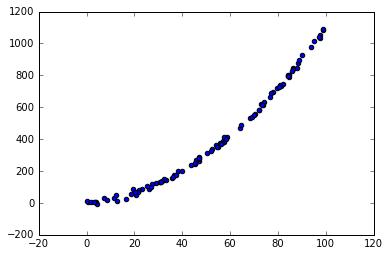

In [18]:
# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)

In [19]:
# calculate the weights of our model

w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X,w)

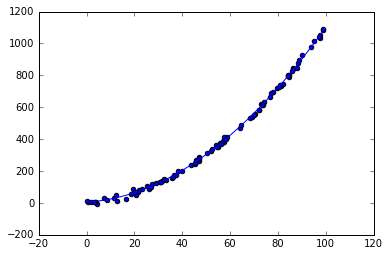

In [20]:
# plot it all together

plt.scatter(X[:,1], Y)
plt.plot(sorted(X[:,1]), sorted(Yhat))

In [21]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

('the r-squared is:', 0.99914122963668583)


# Systolic Blood Pressure

*** No CODEPAGE record, no encoding_override: will use 'ascii'


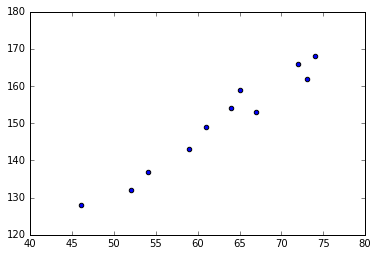

In [22]:
# data is from:
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html

# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in pounds

df = pd.read_excel('mlr02.xls')
X = df.as_matrix()

# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])
plt.show()
# looks pretty linear!


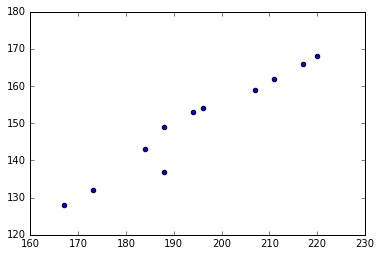

In [23]:
# using weight to predict systolic blood pressure
plt.scatter(X[:,2], X[:,0])
plt.show()
# looks pretty linear!

In [24]:
df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [25]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

In [26]:
print "r2 for x2 only:", get_r2(X2only, Y)
print "r2 for x3 only:", get_r2(X3only, Y)
print "r2 for both:", get_r2(X, Y)

r2 for x2 only: 0.957840720815
r2 for x3 only: 0.941995208529
r2 for both: 0.97684710415
